# Sessie 05 - Continue Kansverdelingen - Oplossing

Reken met kansen en kansverdelingen wordt toegepast in alle domeinen van ons leven, gaande van het uitrekenen van risico’s, het voorspellen van het weer, inschatten van de impact van een reclamecampagne op de omzetcijfers van een bedrijf, modelleren van de verspreiding van een (computer) virus, etc.

De normaalverdeling is de meest gekende en gebruikte kansverdeling in de statistiek. Het is een continue klokvormige kansverdeling die symmetrisch verloopt rond het gemiddelde . Ze is hoog in het midden, en wordt naar lage en hoge waarden steeds kleiner zonder ooit echt nul te worden.
De bedoeling van deze opdracht is om vlot overweg te kunnen met deze kansverdelingen bij het uitrekenen van kansen en het kunnen bepalen van de verwachte waarden van kansverdelingen.

## Inhoud
    • Kunnen nagaan of een reeks gegevens al dan niet normaal verdeeld zijn.
    • Rekenen met en interpreteren van de normaalverdeling.
    • Kunnen uitrekenen van kansen bij normaalverdeelde data
    

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## Vraag 1
Bereken onderstaande kansen met behulp van Python en vergelijk deze waarden met deze van de tabel.

In [2]:
# P(Z < -1,67) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1

p  = stats.norm.cdf(-1.67,loc=0,scale=1)
print(p)

0.04745968180294733


In [3]:
# P(Z > 2,56 ) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
p  = stats.norm.sf(2.56,loc=0,scale=1)
print(p)


0.005233608163555782


In [4]:
# P(1,34 < Z < 2,34) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
p = stats.norm.cdf(2.34,loc=0,scale=1)-stats.norm.cdf(1.34,loc=0,scale=1)
print(p)

0.08048080251909406


In [5]:
# X~N(50;5)   P(X<60) -normaalverdeling met gemiddelde 50 en standaardafwijking 5
p = stats.norm.cdf(60,loc=50,scale=5)
print(p)

0.9772498680518208


In [6]:
# X~N(5;1)   P(X > 2,5) -normaalverdeling met gemiddelde 5 en standaardafwijking 1
p  = stats.norm.sf(2.5,loc=5,scale=1)
print(p)

0.9937903346742238


In [7]:
# X~N(120;6)   P(114 < X < 126) - normaalverdeling met gemiddelde 120 en standaardafwijking 6
p = stats.norm.cdf(126,loc=120,scale=6)-stats.norm.cdf(114,loc=120,scale=6)
print(p)

0.6826894921370859


## Vraag 2

Een omvormer voor zonnepanelen zorgt ervoor dat de opgewekte gelijkstroom door de zonnepanelen wordt omgezet in bruikbare wisselstroom voor ons huishouden. 
De MTTF (Mean Time To Failure = gemiddelde levensduur) van een bepaald type omvormer bedraagt  10 jaar met een standaardafwijking van 3 jaar.
De garantieperiode op deze omvormer is 5 jaar.


a. Wat is de kans dat een omvormer binnen de garantieperiode stuk gaat?

In [1]:
p = stats.norm.cdf(5,loc=10,scale=3)
print('kans dat de omvormer binnen de garantieperiode stuk gaat is',p)

NameError: name 'stats' is not defined

b. Stel dat de zonnepanelen zelf na 20 jaar worden vernieuwd. Wat is de kans dat gedurende deze periode de omvormer nooit vervangen dient te worden?
    

In [9]:
p = stats.norm.sf(20,loc=10,scale=3)
print('kans dat een omvormer nooit hoeft vervangen te worden in 20 jaar:',p)

kans dat een omvormer nooit hoeft vervangen te worden in 20 jaar: 0.0004290603331968372


c. Wat is de kans dat de omvormer stuk gaat tussen de 5 jaar en de 20 jaar en je dus niet op de garantie kunt terugvallen?

In [10]:
p = stats.norm.cdf(20,loc=10,scale=3)- stats.norm.cdf(5,loc=10,scale=3)
print('kans stuk tussen 5 jaar en 20 jaar:',p)

kans stuk tussen 5 jaar en 20 jaar: 0.9517805873939885


d. Na hoeveel jaar moet je de omvormer vervangen om ervoor te zorgen dat je minder dan 10% kans hebt dat je met een kapotte omvormer komt te zitten?

In [11]:
x = stats.norm.isf(0.9,loc=10,scale=3) 
print(x,'jaar')

# alternatief

x = stats.norm.ppf(0.1,loc=10,scale=3)
print(x,'jaar')


6.1553453033661985 jaar
6.1553453033661985 jaar


## Vraag 3

Aan een toelatingsexamen nemen 200 kandidaten deel voor 40 plaatsen. De uitslag is normaal verdeeld. De gemiddelde uitslag bedraagt 70% en de standaardafwijking is 10%. 

a. Welk percentage is vereist om aangenomen te worden indien men de 40 besten aanwerft ?

In [12]:
x = stats.norm.isf(40/200,loc=70,scale=10)
print('vereiste score:',x)

vereiste score: 78.41621233572914


b. Ann haalt 58 en Joachim 75. Hoeveel kandidaten komen er in de rangschikking tussen Ann en Joachim?

In [13]:
p = stats.norm.cdf(75,loc=70,scale=10) - stats.norm.cdf(58,loc=70,scale=10)
print('aantal kandidaten tussen Ann en Joahim',np.round(p*200))

aantal kandidaten tussen Ann en Joahim 115.0


## Vraag 4

De BMI is een index die de verhouding tussen lengte en gewicht bij een persoon weergeeft. De BMI wordt veel gebruikt om een indicatie te krijgen of er sprake is van overgewicht of ondergewicht.
Om de BMI van een persoon te berekenen deel je zijn/haar gewicht door het kwadraat van de lengte. Het gewicht wordt daarbij uitgedrukt in kilogram, de lengte in meter.
Weegt een persoon bijvoorbeeld 67kg en meet deze persoon 172cm, dan is de BMI gelijk aan:
$\frac{67}{1,72^2}=22,65$

Alhoewel de BMI niet altijd even betrouwbaar is hanteert men volgende tabel om de BMI te interpreteren.

| BMI | Interpretatie |
   ----------------  |  ------------- 
| 18,5 tot en met 25 | Normaal gewicht |
| 25 tot en met 27 | Licht overgewicht |
| 27 tot en met 30 | Matig overgewicht |
| 30 tot en met 40 | Ernstig overgewicht |
| Meer dan 40      | Ziekelijk overgewicht

Het bestand BMI.csv bevat lengtes en gewichten van personen die tijdens een steekproef werden opgemeten.

a. Voeg een kolom toe aan de dataset met daarin het berekende BMI van elke persoon. Gebruik daarvoor
    de pandas insert functie: dataset.insert(). Zie: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html
    
b. Teken een histogram van alle BMI waarden en ga na of deze normaal verdeeld zijn. 
    Bepaal daarvoor het gemiddelde en de standaardafwijking. Teken nu bovenop het histogram de theoretische normaalverdeling die overeen komt met het bekomen gemiddelde en de standaardafwijking. Ga ook na of ongeveer 68% van de BMI waarden binnen 1 standaardafwijking van het gemiddelde liggen en ongeveer 95 procent van de BMI waarden binnen de 2 standaardafwijkingen van het gemiddelde.
    
c. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen. Op deze manier kunnen we straks per geslacht aparte conclusies trekken.
    
d. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwen?

e. Hoeveel procent van de mannen in de dataset heeft minstens ernstig overgewicht en hoeveel procent vrouwen in de dataset?

f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met een ernstig overgewicht? En hoeveel procent van de vrouwen?
    
g. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.
    
h. Ga na of er uitschieters in de dataset aanwezig zijn. Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen van het gemiddelde liggen.

In [25]:
# Inlezen van de dataset

dataset = pd.read_csv('BMI.csv')
dataset.head()

,Gewicht,Lengte,Geslacht
0,65.6,174.0,man
1,71.8,175.3,man
2,80.7,193.5,man
3,72.6,186.5,man
4,78.8,187.2,man


In [26]:
# a. Voeg een kolom toe aan de dataset met daarin het berekende BMI van elke persoon...


dataset.insert(3,'BMI',dataset['Gewicht']/(dataset['Lengte']/100)**2)
dataset.head()

,Gewicht,Lengte,Geslacht,BMI
0,65.6,174.0,man,21.667327
1,71.8,175.3,man,23.364722
2,80.7,193.5,man,21.553192
3,72.6,186.5,man,20.872715
4,78.8,187.2,man,22.486120


gemiddelde: 23.463384417269726
standaardafwijking: 3.273258875437302
percentage binnen 1 standaardafwijking: 70.01972386587771 %
percentage binnen 2 standaardafwijking: 96.25246548323472 %
percentage binnen 3 standaardafwijking: 99.40828402366864 %


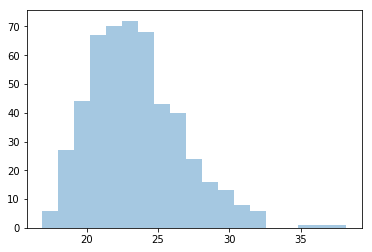

In [27]:
# b. Teken een histogram van alle BMI waarden en ga na of deze normaal verdeeld zijn.
sns.distplot(dataset['BMI'].values,kde=False)

gemiddelde = dataset['BMI'].mean()
stdafwijking = dataset['BMI'].std()
print('gemiddelde:', gemiddelde)
print('standaardafwijking:', stdafwijking)

# percentage waarden binnen 1 standaardafwijking rond gemiddelde:
aantal_1_sigma = dataset[(dataset['BMI']>(gemiddelde-stdafwijking)) & (dataset['BMI']<(gemiddelde+stdafwijking))].BMI.count()
print('percentage binnen 1 standaardafwijking:', aantal_1_sigma/dataset['BMI'].count()*100,'%')

# percentage waarden binnen 2 standaardafwijkingen rond gemiddelde:
aantal_2_sigma = dataset[(dataset['BMI']>(gemiddelde-2*stdafwijking)) & (dataset['BMI']<(gemiddelde+2*stdafwijking))].BMI.count()
print('percentage binnen 2 standaardafwijking:', aantal_2_sigma/dataset['BMI'].count()*100,'%')

# percentage waarden binnen 3 standaardafwijkingen rond gemiddelde:
aantal_3_sigma = dataset[(dataset['BMI']>(gemiddelde-3*stdafwijking)) & (dataset['BMI']<(gemiddelde+3*stdafwijking))].BMI.count()
print('percentage binnen 3 standaardafwijking:', aantal_3_sigma/dataset['BMI'].count()*100,'%')

percentage binnen 1 standaardafwijking bij mannen: 70.8502024291498 %
percentage binnen 2 standaardafwijkingen bij mannen: 96.35627530364373 %
percentage binnen 3 standaardafwijkingen bij mannen: 99.59514170040485 %


[(15, 40)]

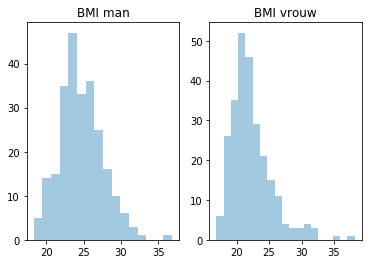

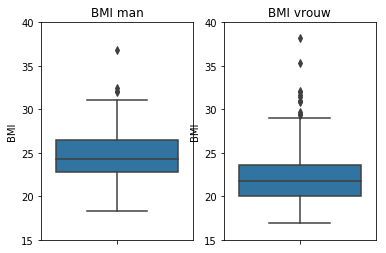

In [39]:
# c. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen... 

dataset_man = dataset[dataset['Geslacht']=='man']
dataset_vrouw = dataset[dataset['Geslacht']=='vrouw']

gemiddelde_man = dataset_man['BMI'].mean()
gemiddelde_vrouw = dataset_vrouw['BMI'].mean()

stdafwijking_man = dataset_man['BMI'].std()
stdafwijking_vrouw = dataset_vrouw['BMI'].std()


# percentage waarden binnen 1 standaardafwijking rond gemiddelde bij mannen:
aantal_1_sigma_man = dataset_man[(dataset_man['BMI']>(gemiddelde_man-stdafwijking_man)) & (dataset_man['BMI']<(gemiddelde_man+stdafwijking_man))].BMI.count()
print('percentage binnen 1 standaardafwijking bij mannen:', aantal_1_sigma_man/dataset_man['BMI'].count()*100,'%')

# percentage waarden binnen 2 standaardafwijkingen rond gemiddelde bij mannen:
aantal_2_sigma_man = dataset_man[(dataset_man['BMI']>(gemiddelde_man-2*stdafwijking_man)) & (dataset_man['BMI']<(gemiddelde_man+2*stdafwijking_man))].BMI.count()
print('percentage binnen 2 standaardafwijkingen bij mannen:', aantal_2_sigma_man/dataset_man['BMI'].count()*100,'%')

# percentage waarden binnen 3 standaardafwijkingen rond gemiddelde bij mannen:
aantal_3_sigma_man = dataset_man[(dataset_man['BMI']>(gemiddelde_man-3*stdafwijking_man)) & (dataset_man['BMI']<(gemiddelde_man+3*stdafwijking_man))].BMI.count()
print('percentage binnen 3 standaardafwijkingen bij mannen:', aantal_3_sigma_man/dataset_man['BMI'].count()*100,'%')

# Histogrammen

# Maken van subplots
f, axes = plt.subplots(1, 2)

sns.distplot(dataset_man['BMI'].values,kde=False,ax=axes[0])
axes[0].set_title('BMI man')
sns.distplot(dataset_vrouw['BMI'].values,kde=False,ax=axes[1])
axes[1].set_title('BMI vrouw')



[(15, 40)]

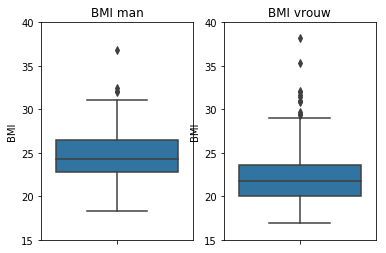

In [40]:
# d. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwen? Verklaar ...
# Boxplots
f, axes = plt.subplots(1, 2)

sns.boxplot(dataset_man['BMI'],whis = 1.5, orient='v',ax=axes[0])
axes[0].set_title('BMI man')
axes[0].set(ylim=(15, 40))
sns.boxplot(dataset_vrouw['BMI'],whis = 1.5, orient='v',ax=axes[1])
axes[1].set_title('BMI vrouw')
axes[1].set(ylim=(15, 40))

In [45]:
# e. Hoeveel procent van de mannen in de dataset heeft minstens ernstig overgewicht en hoeveel procent vrouwen in de dataset?

aantal_man = dataset_man[dataset_man['BMI']>30].BMI.count()
print('aantal mannen in de dataset met minstens ernstig overgewicht:', aantal_man)

aantal_vrouw = dataset_vrouw[dataset_vrouw['BMI']>30].BMI.count()
print('aantal vrouwen in de dataset met minstens ernstig overgewicht:', aantal_vrouw)

print('aantal procent mannen in de dataset met minstens ernstig overgewicht',(aantal_man/dataset_man['BMI'].count())*100,'%')
print('aantal procent vrouwen in de dataset met minstens ernstig overgewicht',(aantal_vrouw/dataset_vrouw['BMI'].count())*100,'%')


aantal mannen in de dataset met minstens ernstig overgewicht: 9
aantal vrouwen in de dataset met minstens ernstig overgewicht: 9
aantal procent mannen in de dataset met minstens ernstig overgewicht 3.643724696356275 %
aantal procent vrouwen in de dataset met minstens ernstig overgewicht 3.4615384615384617 %


In [47]:
# f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met 
#    een ernstig overgewicht? En hoeveel procent van de vrouwen?

p_man = stats.norm.sf(30,loc=gemiddelde_man,scale=stdafwijking_man)
print('percentage mannen met minstens ernstige overgewicht:', p_man*100,'%')

p_vrouw = stats.norm.sf(30,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)
print('percentage vrouwen met minstens ernstige overgewicht:', p_man*100,'%')



percentage mannen met minstens ernstige overgewicht: 3.1515204643118833 %
percentage vrouwen met minstens ernstige overgewicht: 3.1515204643118833 %


In [48]:
# g. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? 
#    En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.

p_man = stats.norm.cdf(18.5,loc=gemiddelde_man,scale=stdafwijking_man)
print('percentage mannen met ondergewicht:', p_man*100,'%')

p_vrouw = stats.norm.sf(18.5,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)
print('percentage vrouwen met ondergewicht:', p_man*100,'%')


percentage mannen met ondergewicht: 1.4509900954662431 %
percentage vrouwen met ondergewicht: 1.4509900954662431 %


In [51]:
# h. Ga na of er uitschieters in de dataset aanwezig zijn. 
#    Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen
#    van het gemiddelde liggen.


upper_limit = gemiddelde + 3*stdafwijking
lower_limit = gemiddelde - 3*stdafwijking


outliers = dataset[(dataset['BMI']<lower_limit) | (dataset['BMI']>upper_limit)]
outliers.head()

print('Aantal uitschieters:',outliers['BMI'].count())


Aantal uitschieters: 3


## Vraag 5
Een kledingfabrikant wil een nieuwe riem op de markt brengen. Er is een variant voor mannen en een variant voor vrouwen. Elke variant komt in smal, medium en large.
Elk soort riem is qua lengte als volgt verstelbaar:


|      Variant       | Mannen| Vrouwen |
|------------|-----|---------------|
| Smal |  Van 80 cm tot 92 cm|  Van 78 cm tot 90 cm|
| Medium | Van 90 cm tot 105 cm| Van 85 cm tot 100 cm|
| Large | Van 102 cm tot 115 cm  | Van 95 cm tot 112 cm|


Om een inschatting te kunnen maken van de productieaantallen laat de fabrikant een onderzoek uitvoeren naar de heupomtrek bij mannen en vrouwen. De gegevens kan je terugvinden onder het bestand 'riemen.csv'.


In [53]:
dataset = pd.read_csv('riemen.csv')
dataset.head()

,Heupomtrek,Geslacht
0,93.5,M
1,94.8,M
2,95.0,M
3,94.0,M
4,98.5,M


a. Ga na of deze data normaalverdeeld is. Doe dit door de kansverdeling te plotten en door na te gaan hoeveel procent van de gegevens binnen de 1, 2 en 3 standaardafwijkingen is gelegen. Vergelijk met de werkelijke normaalverdeling die hoort bij het berekende gemiddelde en standaardafwijking.  Doe de analyse apart voor mannen en vrouwen.

gemiddelde: 96.68086785009861
standaardafwijking: 6.68062273998198
percentage binnen 1 standaardafwijking: 68.63905325443787 %
percentage binnen 2 standaardafwijking: 95.85798816568047 %
percentage binnen 3 standaardafwijking: 99.60552268244575 %


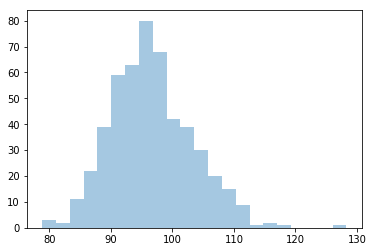

In [55]:
sns.distplot(dataset['Heupomtrek'].values,kde=False)

gemiddelde = dataset['Heupomtrek'].mean()
stdafwijking = dataset['Heupomtrek'].std()
print('gemiddelde:', gemiddelde)
print('standaardafwijking:', stdafwijking)

# percentage waarden binnen 1 standaardafwijking rond gemiddelde:
aantal_1_sigma = dataset[(dataset['Heupomtrek']>(gemiddelde-stdafwijking)) & (dataset['Heupomtrek']<(gemiddelde+stdafwijking))].Heupomtrek.count()
print('percentage binnen 1 standaardafwijking:', aantal_1_sigma/dataset['Heupomtrek'].count()*100,'%')

# percentage waarden binnen 2 standaardafwijkingen rond gemiddelde:
aantal_2_sigma = dataset[(dataset['Heupomtrek']>(gemiddelde-2*stdafwijking)) & (dataset['Heupomtrek']<(gemiddelde+2*stdafwijking))].Heupomtrek.count()
print('percentage binnen 2 standaardafwijking:', aantal_2_sigma/dataset['Heupomtrek'].count()*100,'%')

# percentage waarden binnen 3 standaardafwijkingen rond gemiddelde:
aantal_3_sigma = dataset[(dataset['Heupomtrek']>(gemiddelde-3*stdafwijking)) & (dataset['Heupomtrek']<(gemiddelde+3*stdafwijking))].Heupomtrek.count()
print('percentage binnen 3 standaardafwijking:', aantal_3_sigma/dataset['Heupomtrek'].count()*100,'%')

b. Vergelijk de maten van de mannen en de vrouwen in termen van gemiddelde en spreiding.

mannen: gemiddelde heupomtrek: 97.76315789473684 standaardafwijking 6.228042645198816
vrouwen: gemiddelde heupomtrek: 95.6526923076923 standaardafwijking 6.94072757621269


[(70, 130)]

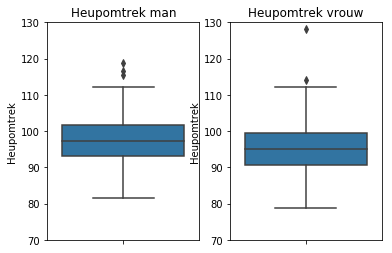

In [61]:
dataset_man = dataset[dataset['Geslacht']=='M']
dataset_vrouw = dataset[dataset['Geslacht']=='V']

gemiddelde_man = dataset_man['Heupomtrek'].mean()
gemiddelde_vrouw = dataset_vrouw['Heupomtrek'].mean()

stdafwijking_man = dataset_man['Heupomtrek'].std()
stdafwijking_vrouw = dataset_vrouw['Heupomtrek'].std()

print('mannen:','gemiddelde heupomtrek:',gemiddelde_man,'standaardafwijking',stdafwijking_man)
print('vrouwen:','gemiddelde heupomtrek:',gemiddelde_vrouw,'standaardafwijking',stdafwijking_vrouw)

f, axes = plt.subplots(1, 2)

sns.boxplot(dataset_man['Heupomtrek'],whis = 1.5, orient='v',ax=axes[0])
axes[0].set_title('Heupomtrek man')
axes[0].set(ylim=(70, 130))
sns.boxplot(dataset_vrouw['Heupomtrek'],whis = 1.5, orient='v',ax=axes[1])
axes[1].set_title('Heupomtrek vrouw')
axes[1].set(ylim=(70, 130))

c. In de veronderstelling dat de data normaalverdeeld is, bereken telkens **voor de populatie** hoeveel procent van de mannen maat smal, medium en large kan dragen. Doe dit ook voor vrouwen. Vul daarbij onderstaande tabel aan.

|       Variant     | Mannen| Vrouwen |
|------------|-----:|---------------:|
| Smal |     %|     %|
| Medium |     %|     %|
| Large |      %|     %|



In [69]:
print('percentage smal mannen:',(stats.norm.cdf(92,loc=gemiddelde_man,scale=stdafwijking_man)-stats.norm.cdf(80,loc=gemiddelde_man,scale=stdafwijking_man))*100,'%')
print('percentage medium mannen:',(stats.norm.cdf(105,loc=gemiddelde_man,scale=stdafwijking_man)-stats.norm.cdf(90,loc=gemiddelde_man,scale=stdafwijking_man))*100,'%')
print('percentage large mannen:',(stats.norm.cdf(115,loc=gemiddelde_man,scale=stdafwijking_man)-stats.norm.cdf(102,loc=gemiddelde_man,scale=stdafwijking_man))*100,'%')

print('percentage smal vrouwen:',(stats.norm.cdf(90,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)-stats.norm.cdf(78,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw))*100,'%')
print('percentage medium vrouwen:',(stats.norm.cdf(100,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)-stats.norm.cdf(85,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw))*100,'%')
print('percentage large vrouwen:',(stats.norm.cdf(112,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)-stats.norm.cdf(95,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw))*100,'%')



percentage smal mannen: 17.521892726795976 %
percentage medium mannen: 77.10842800249837 %
percentage large mannen: 24.533872493332865 %
percentage smal vrouwen: 20.22113873536974 %
percentage medium vrouwen: 67.20411417760879 %
percentage large vrouwen: 52.820597118371346 %


d. Bij hoeveel procent van de mannen past zowel smal als medium?

In [70]:
print((stats.norm.cdf(105,loc=gemiddelde_man,scale=stdafwijking_man)-stats.norm.cdf(80,loc=gemiddelde_man,scale=stdafwijking_man))*100,'%')

87.52061905171354 %


e. Bij hoeveel procent van de vrouwen past zowel medium als large?

In [71]:
print((stats.norm.cdf(112,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)-stats.norm.cdf(85,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw))*100,'%')


92.83300917649396 %


f. Bij hoeveel procent van de mannen past geen enkele maat?

In [75]:
p_te_klein = stats.norm.cdf(80,loc=gemiddelde_man,scale=stdafwijking_man)
print(p_te_klein)
p_te_groot = stats.norm.sf(115,loc=gemiddelde_man,scale=stdafwijking_man)
print(p_te_groot)
print('procent van de mannen waarbij geen enkele maat past:',(p_te_klein+p_te_groot)*100,'%')


0.002171399035861967
0.0028233811196947977
procent van de mannen waarbij geen enkele maat past: 0.49947801555567645 %


g. Bij hoeveel procent van de vrouwen past geen enkele maat?

In [76]:
p_te_klein = stats.norm.cdf(80,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)
print(p_te_klein)
p_te_groot = stats.norm.sf(115,loc=gemiddelde_vrouw,scale=stdafwijking_vrouw)
print(p_te_groot)
print('procent van de vrouwen waarbij geen enkele maat past:',(p_te_klein+p_te_groot)*100,'%')

0.012060554038929187
0.002655787788767497
procent van de vrouwen waarbij geen enkele maat past: 1.4716341827696684 %
